# Effect of Data Size on Model Accuracy
Done on the CIFAR-10 image classification dataset. This dataset contains 60,000 32x32 color images in 10 classes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data preprocessing, normalize the vals to [0,1] to improve convergence
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# one hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
def create_model():
    model = Sequential()
    # 32 filters, 3x3 kernel
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # randomly setting some input units to 0 during training
    model.add(Dropout(0.25))

    # 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 1d vector for fully connected layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) #overfit risk

    #last output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train the model with different data sizes and store the accuracies

In [ ]:
data_sizes = [1000, 5000, 10000, 20000, 40000, 50000]
accuracies = []

for data_size in data_sizes:
    model = create_model()
    history = model.fit(x_train[:data_size], y_train[:data_size], batch_size=64, epochs=20, verbose=1, validation_data=(x_test, y_test))
    accuracy = history.history['val_accuracy'][-1]
    accuracies.append(accuracy)


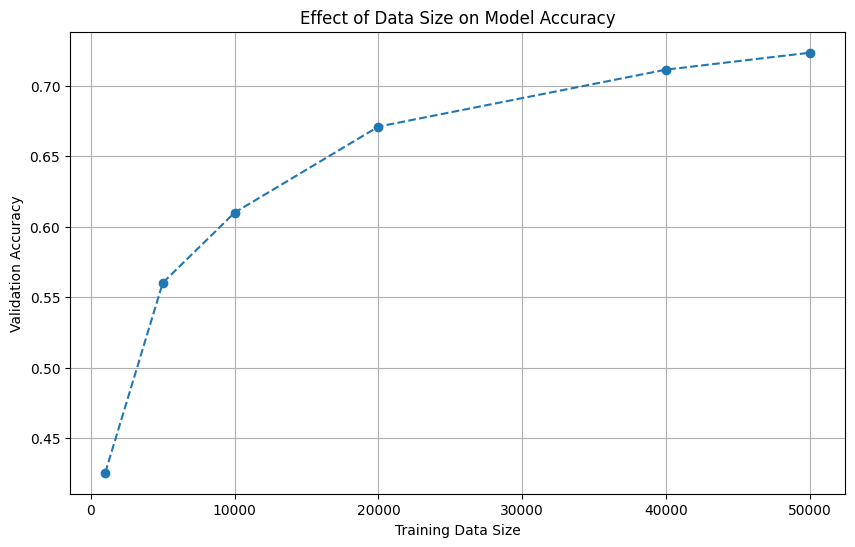

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, accuracies, marker='o', linestyle='--')
plt.xlabel('Training Data Size')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Data Size on Model Accuracy')
plt.grid()
plt.show()
